# <font color='#eb3483'> Natural Language Processing </font>

In this notebook, we will be working with a large dataset of movie reviews from the **Internet Movie Database (IMDb)**. The dataset contains 50,000 movie reviews that have been labelled as positive or negative. Positive means that the movie got a rating of more than six stars, while negative means that it got a rating less than five stars.

Our goal is to build a machine learning model to predict whether a reviewer will like or dislike a movie based on his/her written review.

The dataset can be downloaded [here](//drive.google.com/file/d/1mLLHORSCShHdgQO_m1lTSnKC28EYWtnZ/view?usp=drive_link)



In [1]:
import pandas as pd
import numpy as np

import re # for regular expressions
import requests # to read the HTML at a URL into Python
from bs4 import BeautifulSoup # to extract text from HTML
import nltk # natural language toolkit for stop words, stemming and lemmatization (and more!)

In [2]:
path = "/Users/mollyrudisill/ix24_mollyr/ix_datascience-main/classwork/data/movies.csv"
df = pd.read_csv(path)

In [3]:
#df = pd.read_csv('data/movies.csv')
df

,review,sentiment
0,Working with one of the best Shakespeare sourc...,0
1,"Well...tremors I, the original started off in ...",0
2,Ouch! This one was a bit painful to sit throug...,0
3,"I've seen some crappy movies in my life, but t...",0
4,"""Carriers"" follows the exploits of two guys an...",0
...,...,...
49995,"This movie is certainly well-constructed, begi...",1
49996,Nice to see a comedy for grown ups. Masterfull...,1
49997,Jean Renoir's homage to the Paris of the late ...,1
49998,What are the movies? I mean.. what are movies ...,1


In [4]:
# Count the number of 0s and 1s in 'sentiment'
count_values = df['sentiment'].value_counts()

print(count_values)

sentiment
0    25000
1    25000
Name: count, dtype: int64


## <font color='#eb3483'> Before We Start: List Comprehension in Python </font>

Before we begin our intro to natural language processing, we need to discuss **list comprehension** in Python: an easy way to loop over and select/transform items in a list.

As an example, suppose you have a list:

```python
mylist = [1,2,3,4,5]
```

and you want to return a new list that contains the squared values of each element. How would you do this?

Well, you could use a ```for``` loop:

In [5]:
mylist = [1,2,3,4,5]
newlist = []

for i in range(len(mylist)):
    newlist.append(mylist[i]**2)

newlist

[1, 4, 9, 16, 25]

A neater way to do this is to use **list comprehension**, which essentially includes the ``for`` loop within the list:

In [6]:
[x**2 for x in mylist]

[1, 4, 9, 16, 25]

We can even include an `if` statement in our list comprehension to select only a subset of the items:

In [7]:
[x**2 for x in mylist if x < 4]

[1, 4, 9]

## <font color='#eb3483'> Text Cleaning and Preprocessing </font>

As you'll soon see, converting textual data into a format that can be used for machine learning can take a lot of time and effort. Often the techniques that we use are problem specific. Here, we will explore some of these approaches as they apply to our movies dataset. If you ever find yourself analysing text data, you'll probably need to adapt these methods to suit your needs.

###  <font color='#eb3483'> 1. HTML </font>

Have a look at the first and fourth reviews (indexed as 0 and 3):

In [8]:
df.review.iloc[0]

"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form."

In [9]:
df.review.iloc[3]

"I've seen some crappy movies in my life, but this one must be among the very worst. Definately bottom 100 material (imo, that is).<br /><br />We follow two couples, the Dodds (Billy Bob Thornton as Lonnie Earl and Natasha Richardson as Darlene) and the Kirkendalls (Patrick Swayze as Roy and Charlize Theron as Candy) in one car on a roadtrip to Reno.<br /><br />Apparently, Lonnie isn't too happy with his sex-life, so he cheats on his wife with Candy, who's despirately trying to have a baby. Roy, meanwhile, isn't too sure if his sperm is OK so he's getting it checked by a doctor.<br /><br />Now, I had read the back of the DVD, but my girlfriend didn't, and she blurted out after about 20 minutes: 'oh yeah, she's gonna end up pregnant but her husband can't have any baby's'. Spot on, as this movie is soooo predictable. As well as boring. And annoying. Meaningless. Offensive. Terrible.<br /><br />An example of how much this movie stinks. The two couples set out in their big car towards Neva

You'll notice that they contain expressions like ```<br />```. These are HTML tags - the ``<br>`` tag is used to display a line **br**eak in HTML code. The details are not important, but we probably don't want to keep these in the text.

Let's remove HTML tags using the ``BeautifulSoup`` function from ``bs4``, an extremely useful library for extracting text from HTML and XML files.

In [10]:
BeautifulSoup(df.review.iloc[3], 'html.parser').get_text()

"I've seen some crappy movies in my life, but this one must be among the very worst. Definately bottom 100 material (imo, that is).We follow two couples, the Dodds (Billy Bob Thornton as Lonnie Earl and Natasha Richardson as Darlene) and the Kirkendalls (Patrick Swayze as Roy and Charlize Theron as Candy) in one car on a roadtrip to Reno.Apparently, Lonnie isn't too happy with his sex-life, so he cheats on his wife with Candy, who's despirately trying to have a baby. Roy, meanwhile, isn't too sure if his sperm is OK so he's getting it checked by a doctor.Now, I had read the back of the DVD, but my girlfriend didn't, and she blurted out after about 20 minutes: 'oh yeah, she's gonna end up pregnant but her husband can't have any baby's'. Spot on, as this movie is soooo predictable. As well as boring. And annoying. Meaningless. Offensive. Terrible.An example of how much this movie stinks. The two couples set out in their big car towards Nevada, when they are stopped by 2 police-officers, 

Ah, that looks better! Let's apply this function to all the reviews in our dataset.

In [11]:
# Function to clean HTML tags
def clean_html(text):
    return BeautifulSoup(text, 'html.parser').get_text()

# Apply the function to the entire column
df['review'] = df['review'].apply(clean_html)

df

/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_58570/1364700578.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


,review,sentiment
0,Working with one of the best Shakespeare sourc...,0
1,"Well...tremors I, the original started off in ...",0
2,Ouch! This one was a bit painful to sit throug...,0
3,"I've seen some crappy movies in my life, but t...",0
4,"""Carriers"" follows the exploits of two guys an...",0
...,...,...
49995,"This movie is certainly well-constructed, begi...",1
49996,Nice to see a comedy for grown ups. Masterfull...,1
49997,Jean Renoir's homage to the Paris of the late ...,1
49998,What are the movies? I mean.. what are movies ...,1


We can also use regular expressions library

In [12]:
import re

def remove_html(x):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', x)
    return cleantext

df['review'] = df['review'].apply(remove_html)

In [13]:
df.review.iloc[44]

'This is another typical unbelievable and non-sensical piece of Hollywood dreck.Kurt Russell, as Snake Pliskin in a business suit, convinces me he was a better 2nd baseman. Ray Liotta as the psychotic cop is totally predictable and absurd. Madeline Stowe is her usual cardboard self, and does little to be a convincing victim.Every scene in this persiflage is absolutely predictable all the way to the end when Kurt clouts Ray with a vase or something, knocking him down and out. Kurt and Madeline then do their obligatory end-of-the-movie embrace, and EVERYBODY--- except Russell and Stowe, KNOWS Liotta is going to get back up and menace the couple again.He does, of course, and Russell drills him 10 times with his 9mm, which was ENTIRELY unnecessary. This movie could just as well ended with the bludgeoning scene--- EXCEPT Hollywood dotes on unnecessary violence, and the more they can add, or "enhance", the more slobbery they get.'

###  <font color='#eb3483'> 2. Regular Expressions </font>

If you take a look at a few of the reviews, you'll notice that people write differently. Some write "I" with a capital letter, while others don't worry about capitalization and simply write "i". Some write "cant" while others correctly write "can't" with the apostrophe. Some put a space after a full stop, others don't. We don't want these arbitrary differences affecting out analyses, so let's try and standardize the text. For example, let's convect all letters to lower case:

In [14]:
myreview = df.review.iloc[3]
myreview = myreview.lower()
myreview

"i've seen some crappy movies in my life, but this one must be among the very worst. definately bottom 100 material (imo, that is).we follow two couples, the dodds (billy bob thornton as lonnie earl and natasha richardson as darlene) and the kirkendalls (patrick swayze as roy and charlize theron as candy) in one car on a roadtrip to reno.apparently, lonnie isn't too happy with his sex-life, so he cheats on his wife with candy, who's despirately trying to have a baby. roy, meanwhile, isn't too sure if his sperm is ok so he's getting it checked by a doctor.now, i had read the back of the dvd, but my girlfriend didn't, and she blurted out after about 20 minutes: 'oh yeah, she's gonna end up pregnant but her husband can't have any baby's'. spot on, as this movie is soooo predictable. as well as boring. and annoying. meaningless. offensive. terrible.an example of how much this movie stinks. the two couples set out in their big car towards nevada, when they are stopped by 2 police-officers, 

Now let's find and replace all the commas with a space. You're probably used to doing this on your computer in MS Word - you just hit ``ctrl/cmd + F``, type in the letter/word you want to find, and then replace it. Turns out you can also do this programmatically using the ``sub`` (substitute) function from the `re` module:

In [15]:
re.sub(",", " ", myreview)

"i've seen some crappy movies in my life  but this one must be among the very worst. definately bottom 100 material (imo  that is).we follow two couples  the dodds (billy bob thornton as lonnie earl and natasha richardson as darlene) and the kirkendalls (patrick swayze as roy and charlize theron as candy) in one car on a roadtrip to reno.apparently  lonnie isn't too happy with his sex-life  so he cheats on his wife with candy  who's despirately trying to have a baby. roy  meanwhile  isn't too sure if his sperm is ok so he's getting it checked by a doctor.now  i had read the back of the dvd  but my girlfriend didn't  and she blurted out after about 20 minutes: 'oh yeah  she's gonna end up pregnant but her husband can't have any baby's'. spot on  as this movie is soooo predictable. as well as boring. and annoying. meaningless. offensive. terrible.an example of how much this movie stinks. the two couples set out in their big car towards nevada  when they are stopped by 2 police-officers  

``re.sub`` is actually way more powerful than this. As its first argument, it accepts a **regular expression** or **regex** which is basically a *search pattern*. We can search for **any** pattern we like. For example, we could search a text string for all phone numbers that have the format +XX-XXX-XXX-XXXX, where X is a number. A regular expression is a way to express this pattern programmatically.

We are not going to have time to cover all the possible ways to express patterns, so we'll just consider the ones that are useful for this dataset. For more information in regular expressions, look at the [```re``` help page](https://docs.python.org/3/library/re.html) or Google around.

We previously replaced all commas with a space. Let's also replace full stops, underscores, question marks and exclamation marks. The regex for this is ``[,._?!]`` which translates into "find all instances of ``,`` or ``.``". Note that the square brackets are simply used to enclose the different symbols that we want to find. They are not included in the search.

In [16]:
re.sub("[,._?!]", " ", myreview)

"i've seen some crappy movies in my life  but this one must be among the very worst  definately bottom 100 material (imo  that is) we follow two couples  the dodds (billy bob thornton as lonnie earl and natasha richardson as darlene) and the kirkendalls (patrick swayze as roy and charlize theron as candy) in one car on a roadtrip to reno apparently  lonnie isn't too happy with his sex-life  so he cheats on his wife with candy  who's despirately trying to have a baby  roy  meanwhile  isn't too sure if his sperm is ok so he's getting it checked by a doctor now  i had read the back of the dvd  but my girlfriend didn't  and she blurted out after about 20 minutes: 'oh yeah  she's gonna end up pregnant but her husband can't have any baby's'  spot on  as this movie is soooo predictable  as well as boring  and annoying  meaningless  offensive  terrible an example of how much this movie stinks  the two couples set out in their big car towards nevada  when they are stopped by 2 police-officers  

Let's also get rid of the numbers. Here the regex ``[0-9]`` reads "find any number from 0 to 9".

In [17]:
re.sub("[0-9]", " ", myreview)

"i've seen some crappy movies in my life, but this one must be among the very worst. definately bottom     material (imo, that is).we follow two couples, the dodds (billy bob thornton as lonnie earl and natasha richardson as darlene) and the kirkendalls (patrick swayze as roy and charlize theron as candy) in one car on a roadtrip to reno.apparently, lonnie isn't too happy with his sex-life, so he cheats on his wife with candy, who's despirately trying to have a baby. roy, meanwhile, isn't too sure if his sperm is ok so he's getting it checked by a doctor.now, i had read the back of the dvd, but my girlfriend didn't, and she blurted out after about    minutes: 'oh yeah, she's gonna end up pregnant but her husband can't have any baby's'. spot on, as this movie is soooo predictable. as well as boring. and annoying. meaningless. offensive. terrible.an example of how much this movie stinks. the two couples set out in their big car towards nevada, when they are stopped by   police-officers, 

Let's combine are two regexs to simulatanously substitute commas, fullstops, exclamation and question marks, AND all numbers:

In [18]:
re.sub("[,._?!0-9]", " ", myreview)

"i've seen some crappy movies in my life  but this one must be among the very worst  definately bottom     material (imo  that is) we follow two couples  the dodds (billy bob thornton as lonnie earl and natasha richardson as darlene) and the kirkendalls (patrick swayze as roy and charlize theron as candy) in one car on a roadtrip to reno apparently  lonnie isn't too happy with his sex-life  so he cheats on his wife with candy  who's despirately trying to have a baby  roy  meanwhile  isn't too sure if his sperm is ok so he's getting it checked by a doctor now  i had read the back of the dvd  but my girlfriend didn't  and she blurted out after about    minutes: 'oh yeah  she's gonna end up pregnant but her husband can't have any baby's'  spot on  as this movie is soooo predictable  as well as boring  and annoying  meaningless  offensive  terrible an example of how much this movie stinks  the two couples set out in their big car towards nevada  when they are stopped by   police-officers  

We also probably want to get rid of the dashes in "sex-life" and "police-officers" so that these are each represented by two separate words across all reviewers. Can we just add a "-" into our regex?

Well, no... because a dash is already being used to specify the range of numbers 0-9. Because it already has a special use in a regex, if we want to include it, we must write ``\-`` in the regex:



In [19]:
re.sub("[,._?!0-9\-]", " ", myreview)

"i've seen some crappy movies in my life  but this one must be among the very worst  definately bottom     material (imo  that is) we follow two couples  the dodds (billy bob thornton as lonnie earl and natasha richardson as darlene) and the kirkendalls (patrick swayze as roy and charlize theron as candy) in one car on a roadtrip to reno apparently  lonnie isn't too happy with his sex life  so he cheats on his wife with candy  who's despirately trying to have a baby  roy  meanwhile  isn't too sure if his sperm is ok so he's getting it checked by a doctor now  i had read the back of the dvd  but my girlfriend didn't  and she blurted out after about    minutes: 'oh yeah  she's gonna end up pregnant but her husband can't have any baby's'  spot on  as this movie is soooo predictable  as well as boring  and annoying  meaningless  offensive  terrible an example of how much this movie stinks  the two couples set out in their big car towards nevada  when they are stopped by   police officers  

Similarly, the following *special* symbols also need to be preceded by a slash "\\":

( ) [ ] & | " / \

In [20]:
re.sub("[.,_\-!?\(\)\/0-9]", " ", myreview)

"i've seen some crappy movies in my life  but this one must be among the very worst  definately bottom     material  imo  that is  we follow two couples  the dodds  billy bob thornton as lonnie earl and natasha richardson as darlene  and the kirkendalls  patrick swayze as roy and charlize theron as candy  in one car on a roadtrip to reno apparently  lonnie isn't too happy with his sex life  so he cheats on his wife with candy  who's despirately trying to have a baby  roy  meanwhile  isn't too sure if his sperm is ok so he's getting it checked by a doctor now  i had read the back of the dvd  but my girlfriend didn't  and she blurted out after about    minutes: 'oh yeah  she's gonna end up pregnant but her husband can't have any baby's'  spot on  as this movie is soooo predictable  as well as boring  and annoying  meaningless  offensive  terrible an example of how much this movie stinks  the two couples set out in their big car towards nevada  when they are stopped by   police officers  

You may have noticed that we can end up with a lot of space between some words. A space is itself a character (we just can't see it). We can match a single space with the regex `[ ]`, but what if we want to match 1 or more spaces, so that we can, for instance, replaces three consecutive spaces with a single space? Easy peazy! We just use `[ ]+` as our regex:

In [21]:
myreview = re.sub("[.,_\-!?\(\)\/0-9]", " ", myreview)
myreview = re.sub("[ ]+", " ", myreview)
myreview

"i've seen some crappy movies in my life but this one must be among the very worst definately bottom material imo that is we follow two couples the dodds billy bob thornton as lonnie earl and natasha richardson as darlene and the kirkendalls patrick swayze as roy and charlize theron as candy in one car on a roadtrip to reno apparently lonnie isn't too happy with his sex life so he cheats on his wife with candy who's despirately trying to have a baby roy meanwhile isn't too sure if his sperm is ok so he's getting it checked by a doctor now i had read the back of the dvd but my girlfriend didn't and she blurted out after about minutes: 'oh yeah she's gonna end up pregnant but her husband can't have any baby's' spot on as this movie is soooo predictable as well as boring and annoying meaningless offensive terrible an example of how much this movie stinks the two couples set out in their big car towards nevada when they are stopped by police officers as they didn't stop at a stop sign the 

No more multiple spaces! Finally, let's remove the apostrophes from all contractions (e.g. can't, don't, etc) and possesive words (reviewer's --> reviewers), so that this is handled consistently across reviewers. Instead of replacing it with a space, we will replace it with nothing (that is, ``""``) so we effectly remove it:

In [22]:
myreview = re.sub("'", "", myreview)
myreview

'ive seen some crappy movies in my life but this one must be among the very worst definately bottom material imo that is we follow two couples the dodds billy bob thornton as lonnie earl and natasha richardson as darlene and the kirkendalls patrick swayze as roy and charlize theron as candy in one car on a roadtrip to reno apparently lonnie isnt too happy with his sex life so he cheats on his wife with candy whos despirately trying to have a baby roy meanwhile isnt too sure if his sperm is ok so hes getting it checked by a doctor now i had read the back of the dvd but my girlfriend didnt and she blurted out after about minutes: oh yeah shes gonna end up pregnant but her husband cant have any babys spot on as this movie is soooo predictable as well as boring and annoying meaningless offensive terrible an example of how much this movie stinks the two couples set out in their big car towards nevada when they are stopped by police officers as they didnt stop at a stop sign the guys know ea

That looks good! Let's put everything we've done into a single function and apply it to all reviews:

In [23]:
def reformat_string(x):
    x = x.lower() # change to a lower case
    x = re.sub('[.,_\-!?\(\)\/\"\&0-9]', " ", x) # remove certain characters
    x = re.sub("[ ]+", " ", x) # replace multiple spaces with a single one
    x = re.sub("'", "", x) # remove apostrophes
    return x

df['review'] = df.review.apply(reformat_string)

In [24]:
df.review.iloc[0]

'working with one of the best shakespeare sources this film manages to be creditable to its source whilst still appealing to a wider audience branagh steals the film from under fishburnes nose and theres a talented cast on good form '

In [25]:
df.review.iloc[1]

'well tremors i the original started off in and i found the movie quite enjoyable to watch however they proceeded to make tremors ii and iii trust me those movies started going downhill right after they finished the first one i mean ass blasters now only god himself is capable of answering the question why in gods name would they create another one of these dumpster dives of a movie tremors iv cannot be considered a bad movie in fact it cannot be even considered an epitome of a bad movie for it lives up to more than that as i attempted to sit though it i noticed that my eyes started to bleed and i hoped profusely that the little girl from the ring would crawl through the tv and kill me did they really think that dressing the people who had stared in the other movies up as though they were from the wild west would make the movie with the exact same occurrences any better honestly i would never suggest buying this movie i mean there are cheaper ways to find things that burn well '

### <font color='#eb3483'> 3. Stop Words </font>

Let's go back to our movies dataset and have a look at the first review, for example:

In [26]:
df.review.iloc[0]

'working with one of the best shakespeare sources this film manages to be creditable to its source whilst still appealing to a wider audience branagh steals the film from under fishburnes nose and theres a talented cast on good form '

Many of the words in this sentence are unlikely to be helpful for predicting the reviewer's sentiment. For example, "with", "of", "the", "this" and so on. Such words are referred to as **stop words**, and we would usually like to remove them from the sentence.

The ```nltk``` (**n**atural **l**anguage **t**ool**k**it) library contains a set of 179 English stop words. We can use this list to omit stop words from our reviews:

In [27]:
nltk.download('stopwords') # need to run this the first time only

from nltk.corpus import stopwords
stop = stopwords.words('english')
print('List contains', len(stop), 'stopwords')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mollyrudisill/nltk_data...


List contains 179 stopwords


[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Note that the stop words list contains contractions such as "you're" and "you've" that include an apostophe. Since we removed the apostrophes in our reviews, we will begin by removing them in the stop word list, and then exclude all the words in the stop word list from our reviews.

In [28]:
stop = [re.sub("'", "", w) for w in stop] # list comprehension
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [29]:
df.review.iloc[0]

'working with one of the best shakespeare sources this film manages to be creditable to its source whilst still appealing to a wider audience branagh steals the film from under fishburnes nose and theres a talented cast on good form '

In [30]:
# Split the string in the first element into a list of words.
# Iterate over each word w in the list of words and include w in the resulting list only if it is not in the stop list.
# Join the words back together with a space seperating each word
' '.join([w for w in df.review.iloc[0].split() if w not in stop])

'working one best shakespeare sources film manages creditable source whilst still appealing wider audience branagh steals film fishburnes nose theres talented cast good form'

Now we're ready to put this into a general function that we can apply to all reviews in our dataset:

In [31]:
def remove_stopwords(x):
    return ' '.join([w for w in x.split() if w not in stop])

df['review'] = df.review.apply(remove_stopwords)
df.head()

,review,sentiment
0,working one best shakespeare sources film mana...,0
1,well tremors original started found movie quit...,0
2,ouch one bit painful sit cute amusing premise ...,0
3,ive seen crappy movies life one must among wor...,0
4,carriers follows exploits two guys two gals st...,0


### <font color='#eb3483'> 5. Stemming & Lemmatization </font>

Many words with the same meaning can be written in slighly different ways depending, for example, on tense (past, present and future tense) and plurality (singular vs plural). For example, "run", "ran", "runs" and "running" all refer to the same concept of "running" and we would therefore like to represent all of these different words as a single feature in our model for predicting sentiment. We can use stemming or lemmatization to achieve this.

**Stemming** is the process of transforming a word into its root form to allow us to map related words to the same stem. There are many different stemming algorithms; we will use the first such algo developed by Martin Porter in 1979 and thus known as Porter stemming:

In [32]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [33]:
def stemming(x):
    words = [stemmer.stem(w) for w in x.split()] # do stemming
    return ' '.join(words)

df['review'] = df.review.apply(stemming) # this may take a few minutes if the dataset is large
df.head()

,review,sentiment
0,work one best shakespear sourc film manag cred...,0
1,well tremor origin start found movi quit enjoy...,0
2,ouch one bit pain sit cute amus premis goe hel...,0
3,ive seen crappi movi life one must among worst...,0
4,carrier follow exploit two guy two gal stolen ...,0


Sometimes, stemming produces non-real words. This is usually not a problem. However, if we want gramatically correct words, we can use a similar process called **lemmatization** that attempts to identify the canonical form of a word:

In [34]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') # run this the first time you use it

lemmatizer = WordNetLemmatizer()

# Function to lemmatize each word in a string
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply the function to the 'text' column
df['review'] = df['review'].apply(lemmatize_text)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mollyrudisill/nltk_data...


,review,sentiment
0,work one best shakespear sourc film manag cred...,0
1,well tremor origin start found movi quit enjoy...,0
2,ouch one bit pain sit cute amus premis goe hel...,0
3,ive seen crappi movi life one must among worst...,0
4,carrier follow exploit two guy two gal stolen ...,0


## <font color='#eb3483'> Formatting the Data for Machine Learning </font>

Now that the reviews have been cleaned, we need to convert them into features that can be used in an ML algo.

In a **bag-of-words** model, the frequency of each word in a sentence is regarded as a separate feature, *ignoring its context or adjacent words within a sentence*. In our movies dataset, the idea is that certain words would be more common in negative reviews, while other words would occur more frequently in positive reviews.

Since feature engineering should always be performed on the training set and **not** on the test data, we begin by dividing our movies data into train and test sets, and make all of our decisions on the training data. In this dataset, I have already ordered the rows, so that the first 25,000 rows are the training set and the last 25,000 rows are the test set:

In [35]:
train = df[:25000]
test = df[25000:]

In [36]:
train.sentiment.value_counts()

sentiment
0    12500
1    12500
Name: count, dtype: int64

In [37]:
test.sentiment.value_counts()

sentiment
0    12500
1    12500
Name: count, dtype: int64

### <font color='#eb3483'> 1. Tokenization </font>

The process of splitting the sentences into words is referred to as **tokenization**. In this case, a word is referred to as a **token**. More generally though, a token could be a word pair, triplet or an even longer string of adjacent words.

To contruct our features, we need to get the counts of **all the words/tokens** across **all the reviews** in our training data (25,000 reviews). This is going to be a very large number of words! We refer to this as the **vocabularly**.



In [38]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(train.review.iloc[:5]) # apply just to the first 5 reviews

In [39]:
count_matrix

<5x532 sparse matrix of type '<class 'numpy.int64'>'
	with 620 stored elements in Compressed Sparse Row format>

The output of the ```CountVectorizer``` is a sparse matrix. Most of the counts are zero, so Python uses a memory efficient format to store these data (it only needs to store the non-zero entries in memory). If we want to "see" the matrix, we can use the ```.toarray()``` function:

In [40]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 0]])

Because we only apply the ```CountVectorizer``` to the first 5 reviews, this matrix is still small. It has 533 columns (a vocab of size 533). But if we were to apply it to the full dataset, the number of columns (words) would be more than 50,000, with 25,000 rows! So it makes sense to store this as efficiently as possible. You can extract the vobabularly from the fitted ```CountVectorizer``` object:

In [41]:
count_vectorizer.vocabulary_

{'work': 524,
 'one': 329,
 'best': 42,
 'shakespear': 416,
 'sourc': 436,
 'film': 173,
 'manag': 286,
 'credit': 106,
 'whilst': 513,
 'still': 445,
 'appeal': 21,
 'wider': 516,
 'audienc': 28,
 'branagh': 59,
 'steal': 444,
 'fishburn': 178,
 'nose': 318,
 'there': 471,
 'talent': 463,
 'cast': 76,
 'good': 204,
 'form': 184,
 'well': 511,
 'tremor': 487,
 'origin': 330,
 'start': 443,
 'found': 185,
 'movi': 304,
 'quit': 378,
 'enjoy': 149,
 'watch': 506,
 'howev': 231,
 'proceed': 365,
 'make': 285,
 'ii': 235,
 'iii': 236,
 'trust': 490,
 'go': 199,
 'downhil': 133,
 'right': 394,
 'finish': 176,
 'first': 177,
 'mean': 291,
 'as': 24,
 'blaster': 50,
 'god': 200,
 'capabl': 71,
 'answer': 18,
 'question': 377,
 'name': 308,
 'would': 526,
 'creat': 105,
 'anoth': 17,
 'dumpster': 136,
 'dive': 130,
 'iv': 247,
 'cannot': 68,
 'consid': 96,
 'bad': 35,
 'fact': 166,
 'even': 153,
 'epitom': 150,
 'live': 278,
 'attempt': 27,
 'sit': 429,
 'though': 477,
 'notic': 320,
 'eye': 1

Note that this is a dictionary that maps each word to a column in our ``count_matrix`` array.

In [42]:
count_vectorizer.vocabulary_. keys() # just the vocabulary

dict_keys(['work', 'one', 'best', 'shakespear', 'sourc', 'film', 'manag', 'credit', 'whilst', 'still', 'appeal', 'wider', 'audienc', 'branagh', 'steal', 'fishburn', 'nose', 'there', 'talent', 'cast', 'good', 'form', 'well', 'tremor', 'origin', 'start', 'found', 'movi', 'quit', 'enjoy', 'watch', 'howev', 'proceed', 'make', 'ii', 'iii', 'trust', 'go', 'downhil', 'right', 'finish', 'first', 'mean', 'as', 'blaster', 'god', 'capabl', 'answer', 'question', 'name', 'would', 'creat', 'anoth', 'dumpster', 'dive', 'iv', 'cannot', 'consid', 'bad', 'fact', 'even', 'epitom', 'live', 'attempt', 'sit', 'though', 'notic', 'eye', 'bleed', 'hope', 'profus', 'littl', 'girl', 'ring', 'crawl', 'tv', 'kill', 'realli', 'think', 'dress', 'peopl', 'stare', 'wild', 'west', 'exact', 'occurr', 'better', 'honestli', 'never', 'suggest', 'buy', 'cheaper', 'way', 'find', 'thing', 'burn', 'ouch', 'bit', 'pain', 'cute', 'amus', 'premis', 'goe', 'hell', 'matthew', 'modin', 'almost', 'alway', 'pedestrian', 'annoy', 'disa

In [43]:
# a neater version of the count_matrix:
pd.DataFrame(count_matrix.toarray(), columns=pd.Series(count_vectorizer.vocabulary_).sort_values().index)

,abil,absolut,action,actor,actress,affair,aid,ail,alan,alex,...,woman,word,work,worst,would,writer,written,yeah,younger,yuck
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1,0,1,0,1
4,1,1,1,0,1,0,1,1,0,1,...,1,2,0,1,1,0,0,0,1,0


As mentioned earlier, we could have considered word pairs as our tokens. This is called a **bigram**. This may be useful to deal with **negation** e.g. the bigram "not good" actually has the opposite meaning to unigram "good".  More generally, a token comprising $n$ words is referred to as an **$n$-gram**. Here's how we would implement bigram tokenization with ```CountVectorizer```:

In [44]:
bigram_vectorizer = CountVectorizer(ngram_range = (2,2))
bigram_matrix = bigram_vectorizer.fit_transform(train.review.iloc[:5])
bigram_vectorizer.vocabulary_.keys() # a dictionary mapping words to columns

dict_keys(['work one', 'one best', 'best shakespear', 'shakespear sourc', 'sourc film', 'film manag', 'manag credit', 'credit sourc', 'sourc whilst', 'whilst still', 'still appeal', 'appeal wider', 'wider audienc', 'audienc branagh', 'branagh steal', 'steal film', 'film fishburn', 'fishburn nose', 'nose there', 'there talent', 'talent cast', 'cast good', 'good form', 'well tremor', 'tremor origin', 'origin start', 'start found', 'found movi', 'movi quit', 'quit enjoy', 'enjoy watch', 'watch howev', 'howev proceed', 'proceed make', 'make tremor', 'tremor ii', 'ii iii', 'iii trust', 'trust movi', 'movi start', 'start go', 'go downhil', 'downhil right', 'right finish', 'finish first', 'first one', 'one mean', 'mean as', 'as blaster', 'blaster god', 'god capabl', 'capabl answer', 'answer question', 'question god', 'god name', 'name would', 'would creat', 'creat anoth', 'anoth one', 'one dumpster', 'dumpster dive', 'dive movi', 'movi tremor', 'tremor iv', 'iv cannot', 'cannot consid', 'cons

### <font color='#eb3483'> 2. Term Frequency-Inverse Document Frequency (TF-IDF) </font>

The tokenization process can often produce very many features (i.e. a LARGE vocabularly). Part of the feature engineering process is to try and reduce less very large feature space down, which amounts to selected a subset of the vocabularly that we think is likely to be most relevant for predicting the outcome variable (sentiment, in our example).

The frequency of a term (word) can certainly help here. As we mentioned earlier, if a word tends to occur more frequently among positive reviews than negative ones, then it is likely to be a good predictor. However, terms/words that occur frequently across all documents are not very informative e.g. words like "with" and "is". We therefore want to keep words that occur often within a document, but not often in all documents. The term frequency-inverse document frequency (TF-IDF) attempts to measure this. Higher values indicate that a word is more relevant, and can be used for feature selection.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(train.review)

print('The vocularly has', len(tfidf_vectorizer.vocabulary_.keys()), 'words')

The vocularly has 53815 words


In [46]:
tfidx_df = pd.DataFrame(tfidf_matrix.toarray(), columns=pd.Series(tfidf_vectorizer.vocabulary_).sort_values().index)
tfidx_df.head()

,aa,aaa,aaaaaaah,aaaaah,aaaaatch,aaaahhhhhhh,aaaand,aaaarrgh,aaah,aaargh,...,était,étc,éveri,êxtase,ís,ísnt,østbye,über,üvegtigri,četvorka
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
word_relevance = tfidx_df.sum().sort_values(ascending=False)
word_relevance.head(20)

movi       1395.217537
film       1164.918810
one         693.350536
like        630.859384
good        527.851566
watch       526.649161
time        505.284488
see         477.634255
make        470.569984
stori       463.506564
charact     461.662631
get         445.976145
realli      442.419940
even        426.471006
would       424.594410
bad         420.443611
show        400.694150
well        386.446080
great       384.303172
scene       378.754442
dtype: float64

In [48]:
word_relevance.tail(20)

indicit          0.027906
carrion          0.027906
tannouncement    0.017390
superkick        0.017390
strom            0.017390
nwo              0.017390
wassup           0.017390
rvdmatch         0.017390
champions        0.017390
hurracanrana     0.017390
pinfal           0.017390
turnbuckl        0.017390
noblematch       0.017390
crossfac         0.017390
stormmatch       0.017390
dudleymatch      0.017390
rollup           0.017390
cenamatch        0.017390
hardymatch       0.017390
riksihi          0.017390
dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


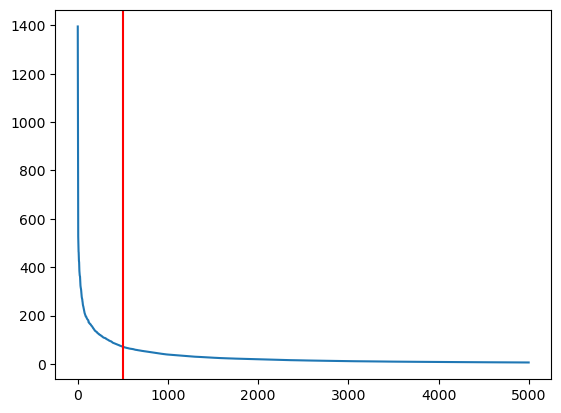

In [49]:
import numpy as np
import seaborn as sns
graph = sns.lineplot(x=np.arange(5000),y=word_relevance.iloc[:5000])
graph.axvline(500, c='r')


The resulting plot will have a red vertical line at the x-coordinate 500, which can be used to highlight a specific point or threshold in the data.

Let's keep just the top 500 words/features for model building:

In [50]:
vocab = word_relevance[:500].index

tfidf_vect = TfidfVectorizer(vocabulary=vocab)
X_train = tfidf_vect.fit_transform(train.review)
X_test  = tfidf_vect.transform(test.review)

In [51]:
print('Training data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Training data shape: (25000, 500)
Test data shape: (25000, 500)


## <font color='#eb3483'> Model Building </font>

Now that we have a set of features and a discrete outcome variable, we can go ahead and train whichever classifier we choose... or better still, try a few different classification algos and choose the best one using the test data!

As an example, let's train an out-of-the-box random forest:

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X=X_train, y=train.sentiment) # this may take a few minutes

RandomForestClassifier()

<Axes: >

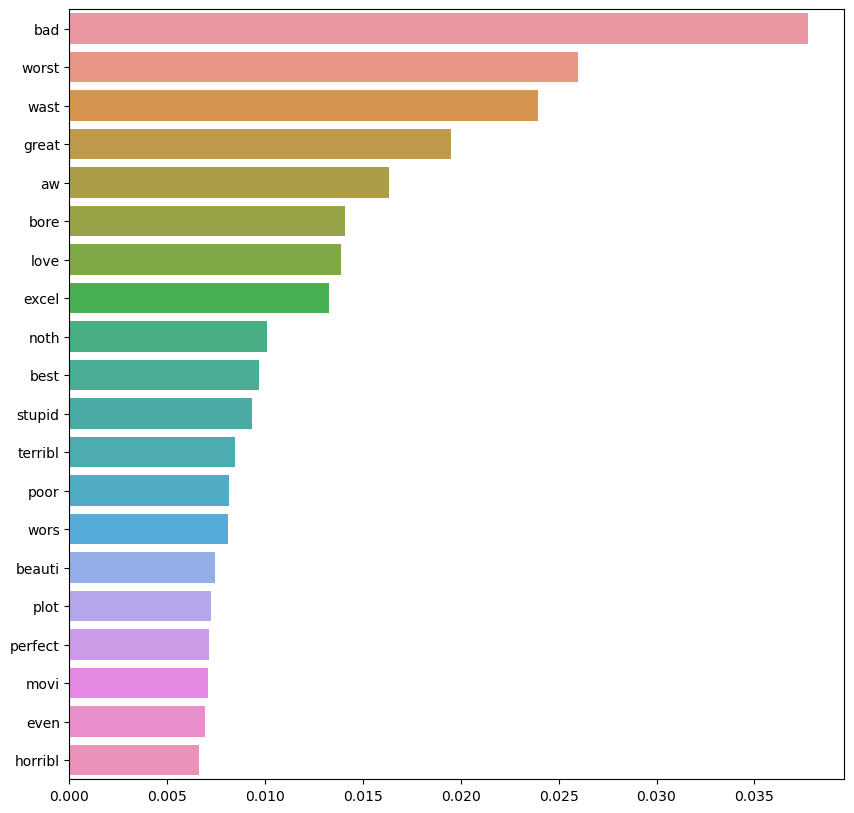

In [53]:
varimp = pd.Series(rf.feature_importances_, index=vocab).sort_values(ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(x=varimp[:20], y=varimp.index[:20])

In [54]:
y_pred = rf.predict(X_test)

Confusion matrix:
 [[10279  2221]
 [ 2244 10256]] 

Test accuracy: 0.8214


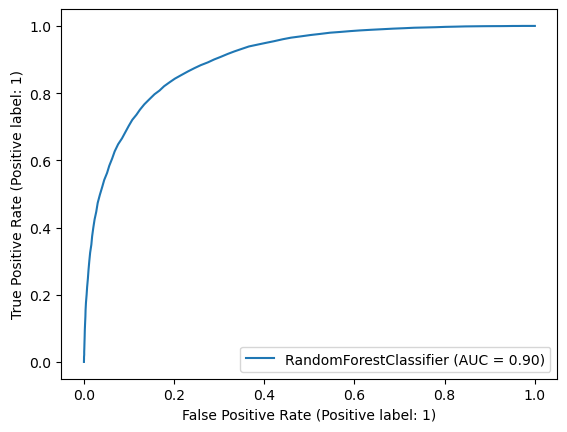

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, RocCurveDisplay
print('Confusion matrix:\n', confusion_matrix(test.sentiment, y_pred), '\n')
print('Test accuracy:', accuracy_score(test.sentiment, y_pred))
RocCurveDisplay.from_estimator(rf, X_test, test.sentiment)

## <font color='#eb3483'> Pre-Trained Sentiment Classifier </font>

In the work above, we trained our own sentiment classifier. This is often useful to identify sentiment within a specific fields, where certain worlds have special meanings. For example, if you were to develop a sentiment classifier for financial news headlines, you would want the word "bull" to have positive sentiment and "bear" to have a negative sentiment (prices rise in "bull markets" and plummet in "bear markets"). In most other contexts, the sentiment around bulls and bears would probably be different.

For some domains, pre-trained models are available. Like our model above, these models typically map words to sentiment scores (called a **lexicon**) that are then combined for a given sentence. Other folk have trained the model on a specific dataset (just like we did above) and made the model available to us.

**For example, the VADER VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon is a sentiment analysis tool that is particularly effective for analyzing social media text.**

In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mollyrudisill/nltk_data...


**sia.polarity** calls the polarity_scores method from the VADER sentiment analysis tool (sia) and returns a dictionary of sentiment scores for the input text x.

The dictionary contains four keys: neg, neu, pos, and compound. The compound score is a normalized, weighted composite score that summarizes the overall sentiment of the text.

In [57]:
#This calls the polarity_scores method from the VADER sentiment analysis tool (sia)
sia.polarity_scores("love")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}

In [58]:
sia.polarity_scores("hate")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}

In [59]:
sia.polarity_scores("bull")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [60]:
sia.polarity_scores("I love waffles and ice-cream")

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}

Let's see how well the VADER lexicon captures the sentiment in our movie reviews:

In [61]:
vader_sentiment = [sia.polarity_scores(x)['compound'] for x in df.review] #This is a list comprehension that iterates over each review in the df.review column, calculates the compound sentiment score for each review, and stores these scores in the list vader_sentiment.
pd.crosstab(np.array(vader_sentiment) > 0, df.sentiment)

sentiment,0,1
row_0,,
False,11812,4269
True,13188,20731


We see that when a movie review has positive sentiment, the VADER lexicon agrees 20731/(20731+4269) = 83% of the time.

But when the reviewer's sentiment is actually negative, VADER only agrees 11811/(11811+13189) = 47% of the time.

Perhaps there are differences between the way people express sentiment in social media compared to in movie reviews?